In [5]:
import random
import json
import urllib.parse

In [22]:
#No-sql injection commands 

queries = [
    ('{"user": "{}", "password": "{}"}', 0),
    ('{"username": {"$regex": "^{}"}}', 1),
    ('{"username": {"$ne": "{}"}}', 1),
    ('{"username": {"$gt": "{}"}}', 1),
    ('{"user": "hacker", "password": {"$ne": ""}}', 1),
    ('{"user": req.query.user, "password": req.query.password}', 0),
    ('{"user": "hacker", "password": {"&ne": ""}}', 1), 
    ('{"user": req.params[\'user\'], "password": req.params[\'password\']}', 0),
    ('{"user": request.GET[\'user\'], "password": request.GET[\'password\']}', 0),
    ('{"user": req.query.user_id, "password": req.query.user_pass}',0),
    ('{"user": req.params[\'user_id\'], "password": req.params[\'user_pass\']}',0),
    ('db.users.find({"user": "user123", "email": "user123@example.com"})',0),
    ('db.users.find({"user": request.GET[\'user\'], "password": request.GET[\'password\']})', 0),
    ('db[\'users\'].find({:user => req.params[\'user\'], :password => req.params[\'password\']})', 0),
    ('db.collection(\'users\').find({"user": "hacker", "password": {"&ne": ""}})', 1),
    ('}); db.dropDatabase(); db.insert({username: ‘dummy ’, password: ‘dummy’', 1),
    ('{"username": {"$eq": "admin"}, "password": {"$regex": "^md" }}', 0), 
    ('login[$nin][]=admin&login[$nin][]=test&pass[$ne]=toto', 1), 
    ("login%255B%2524gt%255D%3Dadmin%26login%255B%2524lt%255D%3Dtest%26pass%255B%2524ne%255D%3D1", 1), 
    ('{"type": "user","name": "oops", "roles": ["_admin"], "roles": [], "password":"apple"}', 1),
    ('true, $where: \'1 == 1\'', 1),
    ('{"$where": "this.username === \'{}\'"}', 1),
    ('{"$or": [{"username": "{}"}, {"isAdmin": true}]}', 1),
    ('{ "$or": [ {}, { "a": "a' , 1),
    ("' } ], $comment:'successful MongoDB injection'", 1),
    ('{"user": "alice", "password": "123456"}', 0),
    ('{"username": {"$regex": "^test"}}', 0),
    ('{"username": {"$ne": "testuser"}}', 0),
    ('{"username": {"$gt": "guest"}}', 0),
    ('{"user": "john", "password": "qwerty"}', 0),
    ('{"user": req.query.name, "password": req.query.pass}', 0),
    ('{"user": req.params[\'name\'], "password": req.params[\'pass\']}', 0),
    ('{"user": request.GET[\'name\'], "password": request.GET[\'pass\']}', 0),
    ('db.users.find({"user": "john", "age": {"$gt": 25}})', 0),
    ('db.users.find({"user": "user", "age": {"$gt": 30}})',0),
    ('db.users.find({"user": request.GET[\'name\'], "password": request.GET[\'pass\']})', 0),
    ('db[\'users\'].find({:user => req.params[\'name\'], :password => req.params[\'pass\']})', 0),
    ("' && this.password.match(/.*/)//+%00", 1),
    ("' && this.passwordzz.match(/.*/)//+%00", 1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("0;return true",1),
    ("|| 1==1",1),
    ("db.injection.insert({success:1});",1),
    ("|| sleep(5)",1),
    ('%27%3B%20return%20%27%27%20==%20%27', 1),
    ("login%5B%24gt%5D=admin&login%5B%24lt%5D=test&pass%5B%24ne%5D=1",1),
    ('%27%20&&%20this.password.match%28%2F.%2A%2F%29%2F%2F%2B%2500', 1),
    ("db.injection.insert({success:1});",1),
    ("|| sleep(5)",1),
    ("|| 1==1",1),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("0;return true",1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("|| this.password.match(/.*/)//+%00", 1),
    ("' && this.password.match(/.*/)//+%00", 1),
    ("' && this.passwordzz.match(/.*/)//+%00", 1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("true, $where: '1 == 1'",1),
    ("$where: '1 == 1'",1),
    ("db.collection('users').find({:user => req.params['user'], :password => req.params['password']})",0),
    ("this.hidden == false && this.category == ''; return '' == ''",0),
    (r"}); db.dropDatabase();", 1), #r is for raw string    
    ('{"category": "electronics"}', 0),
    ('{"category": "electronics", "price": {"$gt": 200}}', 0),
    ('{"category": "electronics", "price": {"$gt": 200}, "name": {"$regex": "^S"}}', 0),
    ('{}', 0),
    ('{"selector": {"department": "engineering"}}', 0),
    ('{"_id": "001", "name": "John Doe", "department": "HR", "salary": 50000}', 0),
    ("SELECT * FROM beer-sample WHERE city='' AND '1'='0' UNION SELECT * FROM system:keyspaces WHERE '1'='1'", 1),
    ("PartitionKey eq 'Customers' and RowKey eq '12345'", 0),
    ("PartitionKey eq 'Employees' and RowKey eq '44455' and Password eq 'password'", 0),
    ("PartitionKey eq 'Children' and RowKey eq '1253' and  Email eq 'email'", 0),
    ("PartitionKey eq 'Patients' and RowKey eq '15334' and Phone eq 'phone'", 0),
    ("0;var date=new Date(); do{curDate = new Date();}while(curDate-date<10000)",1),
    ('{"user": "{}", "password": "{}"}', 0),
    ('{"username": {"$regex": "^{}"}}', 1),
    ('{"username": {"$ne": "{}"}}', 1),
    ('{"username": {"$gt": "{}"}}', 1),
    ('{"user": "hacker", "password": {"$ne": ""}}', 1),
    ('{"user": req.query.user, "password": req.query.password}', 0),
    ('{"user": "hacker", "password": {"&ne": ""}}', 1),
    ('{"user": req.params[\'user\'], "password": req.params[\'password\']}', 0),
    ('{"user": request.GET[\'user\'], "password": request.GET[\'password\']}', 0),
    ('db.users.find({"user": request.GET[\'user\'], "password": request.GET[\'password\']})', 0),
    ('db[\'users\'].find({:user => req.params[\'user\'], :password => req.params[\'password\']})', 0),
    ('db.collection(\'users\').find({"user": "hacker", "password": {"&ne": ""}})', 1),
    ('}); db.dropDatabase(); db.insert({username: ‘dummy ’, password: ‘dummy’', 1),
    ('{"username": {"$eq": "admin"}, "password": {"$regex": "^md" }}', 0), 
    ('login[$nin][]=admin&login[$nin][]=test&pass[$ne]=toto', 1), 
    ("login%255B%2524gt%255D%3Dadmin%26login%255B%2524lt%255D%3Dtest%26pass%255B%2524ne%255D%3D1", 1), 
    ('{"type": "user","name": "oops", "roles": ["_admin"], "roles": [], "password":"apple"}', 1),
    ('db.users.find({"name": {"$regex": "^j"}})',0),
    ('db.users.find({"bio": {"$exists": true, "$ne": ""}})',0),
    ('true, $where: \'1 == 1\'', 1),
    ('{"$where": "this.username === \'{}\'"}', 1),
    ('{"$or": [{"username": "{}"}, {"isAdmin": true}]}', 1),
    ('{ "$or": [ {}, { "a": "a' , 1),
    ("' } ], $comment:'successful MongoDB injection'", 1),
    ('{"user": "alice", "password": "123456"}', 0),
    ('{"username": {"$regex": "^test"}}', 0),
    ('{"username": {"$ne": "testuser"}}', 0),
    ('{"username": {"$gt": "guest"}}', 0),
    ('{"user": "john", "password": "qwerty"}', 0),
    ('{"user": req.query.name, "password": req.query.pass}', 0),
    ('{"user": req.params[\'name\'], "password": req.params[\'pass\']}', 0),
    ('{"user": request.GET[\'name\'], "password": request.GET[\'pass\']}', 0),
    ('db.users.find({"user": "john", "age": {"$gt": 25}})', 0),
    ('db.users.find({"user": "user", "age": {"$gt": 30}})',0),
    ('db.users.find({"user": request.GET[\'name\'], "password": request.GET[\'pass\']})', 0),
    ('db[\'users\'].find({:user => req.params[\'name\'], :password => req.params[\'pass\']})', 0),
    ("' && this.password.match(/.*/)//+%00", 1),
    ("' && this.passwordzz.match(/.*/)//+%00", 1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("0;return true",1),
    ("|| 1==1",1),
    ("db.injection.insert({success:1});",1),
    ('%27%3B%20return%20%27%27%20==%20%27', 1),
    ("login%5B%24gt%5D=admin&login%5B%24lt%5D=test&pass%5B%24ne%5D=1",1),
    ('%27%20&&%20this.password.match%28%2F.%2A%2F%29%2F%2F%2B%2500', 1),
    ("db.injection.insert({success:1});",1),
    ("|| sleep(5)",1),
    ('db.users.aggregate([{"$group": {"_id": "$phone", "count": {"$sum": 1}}}, {"$match": {"count": {"$gt": 1}}}])', 0),
    ('db.users.find().sort({"status": 1, "age": -1})', 0),
    ('db.users.find({"login_count": {"$gt": 10}, "last_login": {"$gte": ISODate("2023-06-01")}})', 0),
    ('db.users.find({"login_count": {"$gt": 10}, "last_login": {"$gte": ISODate("2023-06-01")}})', 0),
    ('db.users.remove({"user": "user123"})', 0),
    ('db.database.getIndexes()', 0),
    ('db.database.createIndex({"user": 1})', 0),
    ('db.database.stats()', 0),
    ('db.database.drop()', 0),
    ('db.database.insert({$where: "this.user === \\"admin\\" && this.password === \\"password\\"}"})', 1),
    ('db.database.update({"user": "user123"}, {"$set": {$where: "this.password === \\"new_password\\""}})', 1),
    ('db.database.drop({$where: "1 === 1"})', 1),
    ('db.database.stats({$where: "1 === 1"})', 1),
    ('db.database.getIndexes({$where: "1 === 1"})', 1),
    ('db.database.createIndex({$where: "this.user === \\"user123\\"})', 1),
    ('db.database.remove({$where: "this.user === \\"admin123\\""})', 1),
    ('db.users.find({"last_login": {"$gte": ISODate("2023-07-01")}})', 0),
    ('db.users.find({"last_login": {"$lt": ISODate("2023-05-25")}})', 0),
    ('db.users.find().sort({"age": -1})', 0),
    ('db.users.find({"status": "active"})', 0),
    ('db.users.find({"registration_date": {"$gte": ISODate("2023-07-01")}})', 0),
    ('db.users.find({"profile_info": null})', 0),
    ('db.users.find({"user": {"$regex": "^A"}})', 0),
    ('db.users.find({"email": {"$exists": true}})', 0),
    ('db.users.find({"age": {"$gt": 20, "$lt": 40}})', 0),
    ('db.users.find({"role": "admin"})', 0),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("0;return true",1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("|| this.password.match(/.*/)//+%00", 1),
    ("' && this.password.match(/.*/)//+%00", 1),
    ("' && this.passwordzz.match(/.*/)//+%00", 1),
    ("';it=new%20Date();do{pt=new%20Date();}while(pt-it<5000);",1),
    ("';sleep(5000);",1),
    ("0;return true;var%20password%20=%20this.password.match(/.*/);",1),
    ("true, $where: '1 == 1'",1),
    ("$where: '1 == 1'",1),
    ("db.collection('users').find({:user => req.params['user'], :password => req.params['password']})",0),
    ("this.hidden == false && this.category == ''; return '' == ''",0), 
    ('{"category": "electronics"}', 0),
    ('{"category": "electronics", "price": {"$gt": 200}}', 0),
    ('{"category": "electronics", "price": {"$gt": 200}, "name": {"$regex": "^S"}}', 0),
    ('{}', 0),
    ('{"selector": {"department": "engineering"}}', 0),
    ('{"_id": "001", "name": "John Doe", "department": "HR", "salary": 50000}', 0),
    ("SELECT * FROM beer-sample WHERE city='' AND '1'='0' UNION SELECT * FROM system:keyspaces WHERE '1'='1'", 1),
    ("PartitionKey eq 'Customers' and RowKey eq '12345'", 0),
    ("PartitionKey eq 'Employees' and RowKey eq '44455' and Password eq 'password'", 0),
    ("PartitionKey eq 'Children' and RowKey eq '1253' and  Email eq 'email'", 0),
    ("PartitionKey eq 'Patients' and RowKey eq '15334' and Phone eq 'phone'", 0),
    ("0;var date=new Date(); do{curDate = new Date();}while(curDate-date<10000)",1),
    ('db.collection.find({$where: "function() {return this.username.indexOf("admin") !== -1}"})',1),
    ('db.collection.find({$or: [{"status": "active"}, {"isAdmin": true}]})',1),
    ('db.collection.find({"email": {"$regex": "^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}$"}})',1),
    ('db.collection.find({$where: "this.password.length >= 12"})',1),
    ('{"user": "{}", "password": "pass"}', 0),
    ('{"user": "user", "password": "{}"}', 0),
    ('{"user": "admin", "password": "admin"}', 0),
    ('{"user": "testuser", "password": "testuser"}', 0),
    ('{"user": "$username", "password": "$password"}', 0),
    ('{"id": {}, "value": 1}', 0),
    ('{"name": "John", "age": {}}', 0),
    ('{"$where": "this.age >= {}"}', 1),
    ('{"user": "admin", "password": {}}', 1),
    ('{"user": "test", "password": "test"}', 1),
    ('{"user": {"$ne": "testuser"}, "password": "pass"}', 1),
    ('{"username": {"$regex": "^test"}}', 1),
    ('{"user": {"$gt": "guest"}, "password": "pass"}', 1),
    ('{"type": "user", "name": "admin", "roles": ["_admin"], "password": "123456"}', 1),
    ('{ "$or": [ {"username": "admin"}, {"isAdmin": true} ]}', 1),
    ('{"username": {"$regex": ".*{}.*"}}', 1),
    ('{"user": "admin", "password": {"$nin": ["pass", "test"]}}', 1),
    ('{"$where": "this.username == \'{}\'"}', 1),
    ('{"user": {"$in": ["admin", "root"]}, "password": "password"}', 1),
    ('{"username": {"$regex": "^{}$", "$options": "i"}}', 1),
    ('{"user": {"$exists": true}, "password": {"$exists": true}}', 1),
    ('{"user": {"$exists": false}, "password": {"$exists": false}}', 1),
    ('{"name": {"$not": { "$type": "string" }}}', 1),
    ('{"name": {"$mod": [5, 0]}}', 1),
    ('{"$where": "this.password.length > 10"}', 1),
    ('{"user": "test", "password": "pass"}', 0),
    ('{"name": "John Doe", "age": {}}', 0),
    ('{"$or": [{"username": "test"}, {"isAdmin": false}]}', 0),
    ('{"user": "guest", "password": "guest"}', 0),
    ('{"type": "admin", "name": "admin", "roles": ["admin"], "password": "admin"}', 0),
    ('{ "$and": [ {"username": "admin"}, {"isAdmin": true} ]}', 0),
    ('{"$nor": [{"username": "testuser"}, {"isAdmin": false}]}', 1),
    ('{"user": {"$size": 3}, "password": "123456"}', 1),
    ('{"$where": "this.age <= {}"}', 1),
    ('{"name": {"$type": 2}}', 1),
    ('{"name": {"$type": 16}}', 1),
    ('{"username": {"$regex": "^test", "$options": "i"}}', 1),
    ('{"user": "guest", "password": {"$ne": "guest"}}', 1),
    ('{"user": {"$regex": "^{}$"}, "password": "pass"}', 1),
    ('{"username": {"$gt": null}}', 1),
    ('{"username": {"$exists": false}, "password": {"$exists": true}}', 1),
    ('{"name": {"$not": { "$type": 3 }}}', 1),
    ('{"name": {"$not": { "$type": 18 }}}', 1),
    ('{"$where": "this.password.length <= 5"}', 1),
    ('{"user": "test", "password": "password"}', 0),
    ('{"name": "Alice", "age": {}}', 0),
    ('{"$or": [{"username": "user"}, {"isAdmin": true}]}', 0),
    ('{"user": "john", "password": "qwerty"}', 0),
    ('{"type": "user", "name": "user", "roles": ["user"], "password": "user"}', 0),
    ('{ "$and": [ {"username": "test"}, {"isAdmin": false} ]}', 0),
    ('{"user": ["testuser", "admin"], "password": "password"}', 1),
    ('{"username": {"$regex": "{}|admin", "$options": "i"}}', 1),
    ('{"$and": [{"username": "test"}, {"isAdmin": false}] }', 1),
    ('{"user": {"$size": 1}, "password": "test"}', 1),
    ('{"$where": "this.age > 20 && this.gender === \'male\'"}', 1),
    ('{"name": {"$type": 4}}', 1),
    ('{"name": {"$type": 17}}', 1),
    ('{"username": {"$regex": "^{}$"}, "password": {"$ne": "test"}}', 1),
    ('{"username": {"$gt": null}, "password": {"$eq": "password"}}', 1),
    ('{"name": {"$exists": true}, "password": {"$exists": false}}', 1),
    ('{"name": {"$not": { "$type": 1 }}}', 1),
    ('{"name": {"$not": { "$type": 19 }}}', 1),
    ('{"$where": "this.password.length > 8 && this.name === \'admin\'"}', 1),
    ('{"user": "admin", "password": "admin"}', 1),
    ('{"user": "root", "password": "root"}', 1),
    ('{"user": "admin", "password": "password123"}', 1),
    ('{"user": "testuser", "password": "testuser123"}', 1),
    ('{"user": "test", "password": "test"}', 0),
    ('{"name": "Bob", "age": {}}', 0),
    ('{"$or": [{"username": "guest"}, {"isAdmin": false}]}', 0),
    ('{"user": "john", "password": "password123"}', 0),
    ('{"type": "user", "name": "user", "roles": ["user"], "password": "user"}', 0),
    ('{ "$and": [ {"username": "test"}, {"isAdmin": false} ]}', 0),
    ('{"user": {"$elemMatch": {"$eq": "admin"}}, "password": {"$ne": "test"}}', 1),
    ('{"username": {"$regex": "{}.*admin.*", "$options": "i"}}', 1),
    ('{"$and": [{"username": "test"}, {"isAdmin": true}] }', 1),
    ('{"user": {"$size": 2}, "password": "123456"}', 1),
    ('{"$where": "this.age > 30 && this.gender === \'female\'"}', 1),
    ('{"name": {"$type": 5}}', 1),
    ('{"name": {"$type": 20}}', 1),
    ('{"username": {"$regex": "^{}$", "$options": "i"}, "password": {"$ne": "admin"}}', 1),
    ('{"username": {"$gt": null}, "password": {"$eq": "admin"}}', 1),
    ('{"name": {"$exists": false}, "password": {"$exists": true}}', 1),
    ('{"name": {"$not": { "$type": 6 }}}', 1),
    ('{"name": {"$not": { "$type": 21 }}}', 1),
    ('{"$where": "this.password.length > 12 && this.name === \'root\'"}', 1),
    ('{"user": "admin", "password": "administrator"}', 1),
    ('{"user": "root", "password": "administrator"}', 1),
    ('{"user": "admin", "password": "admin123"}', 1),
    ('{"user": "testuser", "password": "testuser2023"}', 1),
    ('{"user": "test", "password": "pass123"}', 0),
    ('{"name": "Jane", "age": {}}', 0),
    ('{"$or": [{"username": "guest"}, {"isAdmin": true}]}', 0),
    ('{"user": "john", "password": "password2023"}', 0),
    ('{"type": "user", "name": "user", "roles": ["user"], "password": "secure123"}', 0),
    ('{ "$and": [ {"username": "user"}, {"isAdmin": false} ]}', 0),
    ('{"type": "user", "name": "user", "roles": ["user"], "password": "password2023"}', 0),
    ('{ "$and": [ {"username": "admin"}, {"isAdmin": false} ]}', 0),
    ('{"user": "malicious1", "password": "malicious1password"}', 1),
    ('{"username": {"$regex": "^malicious2"}}', 1),
    ('{"user": "test", "password": "test{}"}', 1),
    ('{"user": {"$in": ["admin", "root", "hacker"]}, "password": "password"}', 1),
    ('{"user": {"$size": 4}, "password": "123456"}', 1),
    ('{"$where": "this.age > 25 && this.gender === \'male\'"}', 1),
    ('{"name": {"$type": 22}}', 1), 
    ('{"name": {"$type": 23}}', 1),  
    ('{"username": {"$regex": "^(malicious3|malicious4)\\\\d+"}}', 1), 
    ('{"user": {"$eq": "admin"}, "password": "malicious5"}', 1),
    ('{"user": {"$regex": "^malicious6"}}', 1),
    ('{"$or": [{"isAdmin": true}, {"name": {"$regex": "^(malicious7|malicious8)"}}]}', 1),
    ('{"user": "malicious9", "password": {"$ne": "malicious9password"}}', 1),
    ('{"user": {"$in": ["admin", "root", "malicious10"]}, "password": "malicious10password"}', 1),
    ('{"user": {"$size": 10}, "password": {"$type": 200}}', 1),
    ('{"user": {"$regex": "^malicious23"}, "age": {"$exists": true}}', 1),
    ('{"user": "benign28", "name": {"$type": 2}}', 0),
    ('{"user": "benign27", "age": {"$exists": true}}', 0),
    ('db.categories.createIndex({"name": 1})', 0),
    ('db.reviews.remove({"user": "benign24"})', 0),
    ('db.orders.insert({"user": "user123", "product": "ProductA", "quantity": 2})', 0),
    ('db.customers.update({"user": "user123"}, {"$set": {"email": "new_email@example.com"}})', 0),
    ('{"user": "benign1", "password": "benign1password"}', 0),
    ('{"username": {"$regex": "^benign2"}}', 0),
    ('{"user": "test", "password": "test{}"}', 0),
    ('{"user": {"$in": ["guest", "user", "benign3"]}, "password": "password"}', 0),
    ('{"user": {"$size": 5}, "password": "123456"}', 0),
    ('{"$where": "this.age > 30 && this.gender === \'female\'"}', 0),
    ('{"name": {"$type": 24}}', 0), 
    ('{"name": {"$type": 25}}', 0),  
    ('{"username": {"$regex": "^(benign4|benign5)\\\\d+"}}', 0), 
    ('{"user": {"$eq": "user"}, "password": "benign6"}', 0),
    ('{"user": {"$regex": "^benign7"}}', 0),
    ('{"$or": [{"isAdmin": false}, {"name": {"$regex": "^(benign8|benign9)"}}]}', 0),
    ('{"user": "benign10", "password": {"$ne": "benign10password"}}', 0),
    ('{"user": {"$in": ["guest", "user", "benign11"]}, "password": "benign11password"}', 0),
    ('{"user": "malicious11", "password": "malicious11password"}', 1),
    ('{"username": {"$regex": "^malicious12"}}', 1),
    ('{"user": "test", "password": "test123{}"}', 1),
    ('{"user": {"$in": ["admin", "root", "hacker", "malicious13"]}, "password": "password"}', 1),
    ('{"user": {"$size": 6}, "password": "123456"}', 1),
    ('{"$where": "this.age > 30 && this.gender === \'male\' && this.status === \'active\'"}', 1),
    ('{"name": {"$type": 26}}', 1),  
    ('{"name": {"$type": 27}}', 1), 
    ('{"username": {"$regex": "^(malicious14|malicious15)\\\\d+"}}', 1), 
    ('{"user": {"$eq": "admin"}, "password": "malicious16"}', 1),
    ('{"user": {"$regex": "^malicious17"}}', 1),
    ('{"$or": [{"isAdmin": true}, {"name": {"$regex": "^(malicious18|malicious19)"}}]}', 1),
    ('{"user": "malicious20", "password": {"$ne": "malicious20password"}}', 1),
    ('{"user": {"$in": ["admin", "root", "malicious21", "hacker"]}, "password": "malicious21password"}', 1),
    ('{"user": "benign12", "password": "benign12password"}', 0),
    ('{"username": {"$regex": "^benign13"}}', 0),
    ('{"user": "test", "password": "test456{}"}', 0),
    ('{"user": {"$in": ["guest", "user", "benign14"]}, "password": "password"}', 0),
    ('{"user": {"$size": 7}, "password": "123456"}', 0),
    ('{"$where": "this.age > 35 && this.gender === \'female\' && this.status === \'active\'"}', 0),
    ('{"name": {"$type": 28}}', 0),  
    ('{"name": {"$type": 29}}', 0),  
    ('{"username": {"$regex": "^(benign15|benign16)\\\\d+"}}', 0), 
    ('{"user": {"$eq": "user"}, "password": "benign17"}', 0),
    ('{"user": {"$regex": "^benign18"}}', 0),
    ('{"$or": [{"isAdmin": false}, {"name": {"$regex": "^(benign19|benign20)"}}]}', 0),
    ('{"user": "benign21", "password": {"$ne": "benign21password"}}', 0),
    ('{"user": {"$in": ["guest", "user", "benign22"]}, "password": "benign22password"}', 0),
    ('{"$where": "this.age > 35 && this.gender === \'female\' && this.isActive === true"}', 1),
    ('{"name": {"$type": 30}}', 1),  
    ('{"username": {"$regex": "^(malicious23|malicious24)\\\\d+"}, "isAdmin": false}', 1),
    ('{"user": {"$gt": "admin"}, "password": "maliciouspassword"}', 1),
    ('{"$or": [{"username": "malicious25"}, {"isAdmin": true}]}', 1),
    ('{"user": "malicious26", "password": {"$ne": "maliciouspassword"}}', 1),
    ('{"user": {"$in": ["admin", "root", "malicious27", "hacker", "test"]}, "password": "maliciouspassword"}', 1),
    ('{"$and": [{"username": "testuser"}, {"isAdmin": false}] }', 0),
    ('{"user": {"$size": 9}, "password": "benignpassword"}', 0),
    ('{"$where": "this.age > 40 && this.gender === \'male\' && this.isActive === true"}', 0),
    ('{"name": {"$type": 31}}', 0),  
    ('{"username": {"$regex": "^(benign23|benign24)\\\\d+"}, "isAdmin": true}', 0),
    ('{"user": {"$gt": "user"}, "password": "benignpassword"}', 0),
    ('{"$or": [{"username": "benign25"}, {"isAdmin": false}]}', 0),
    ('{"user": "benign26", "password": {"$ne": "benignpassword"}}', 0),
    ('{"user": {"$in": ["guest", "user", "Superuser", "test"]}, "password": "password123"}', 0),
    ('{"user": {"$elemMatch": {"$eq": "user"}}, "password": {"$ne": "test"}}', 1),
    ('{"user": {"$elemMatch": {"$eq": "guest"}}, "password": {"$ne": "guest"}}', 1),
    ('{"user": {"$elemMatch": {"$eq": "admin"}}, "password": {"$ne": "admin"}}', 1),
    ('{"username": {"$regex": "^user"}, "isAdmin": true}', 1),
    ('{"username": {"$regex": "^guest"}, "isAdmin": true}', 1),
    ('{"username": {"$regex": "^admin"}, "isAdmin": true}', 1),
    ('{"user": {"$in": ["admin", "root", "hacker", "test", "guest"]}, "password": "password"}', 1),
    ('{"user": {"$in": ["user", "admin", "guest", "test", "hacker"]}, "password": "password"}', 1),
    ('{"user": {"$in": ["guest", "test", "user", "admin", "hacker"]}, "password": "password"}', 1),
    ('{"user": {"$size": 8}, "password": "123456"}', 1),
    ('{"user": {"$size": 10}, "password": "12345678"}', 1),
    ('{"$where": "this.age > 40 && this.gender === \'male\' && this.status === \'active\'"}', 1),
    ('{"$where": "this.age > 45 && this.gender === \'male\' && this.status === \'active\'"}', 1), 
    ('{"name": {"$type": 33}}', 0),  
    ('{"name": {"$type": 34}}', 0),  
    ('{"username": {"$regex": "^(malicious28|malicious29)\\\\d+"}, "isAdmin": false}', 1),
    ('{"username": {"$regex": "^(malicious30|malicious31)\\\\d+"}, "isAdmin": false}', 1),
    ('{"user": {"$gt": "admin"}, "password": "maliciouspassword"}', 1),
    ('{"user": {"$gt": "user"}, "password": "maliciouspassword"}', 1),
    ('{"$or": [{"username": "malicious32"}, {"isAdmin": true}]}', 1),
    ('{"$or": [{"username": "malicious33"}, {"isAdmin": true}]}', 1),
    ('{"user": "malicious34", "password": {"$ne": "maliciouspassword"}}', 1),
    ('{"user": "malicious35", "password": {"$ne": "maliciouspassword"}}', 1),
    ('{"user": {"$in": ["admin", "root", "malicious36", "hacker", "test", "guest"]}, "password": "password123"}', 1),
    ('{"user": {"$in": ["user", "admin", "guest", "test", "hacker", "malicious37"]}, "password": "admin123"}', 1),
    ('{"$and": [{"username": "guest"}, {"isAdmin": false}] }', 0),
    ('{"$and": [{"username": "test"}, {"isAdmin": true}] }', 0),
    ('{"user": {"$size": 11}, "password": "benignpassword"}', 0),
    ('{"user": {"$size": 12}, "password": "benignpassword"}', 0),
    ('{"$where": "this.age > 50 && this.gender === \'male\' && this.status === \'active\'"}', 0),
    ('{"$where": "this.age > 55 && this.gender === \'female\' && this.status === \'active\'"}', 0),
    ('{"username": {"$regex": "^(benign28|benign29)\\\\d+"}, "isAdmin": true}', 0),
    ('{"username": {"$regex": "^(benign30|benign31)\\\\d+"}, "isAdmin": true}', 0),
    ('{"user": {"$gt": "user"}, "password": "benignpassword"}', 0),
    ('{"user": {"$gt": "guest"}, "password": "benignpassword"}', 0),
    ('{"$or": [{"username": "admin1"}, {"isAdmin": false}]}', 0),
    ('{"$or": [{"username": "Admin123"}, {"isAdmin": false}]}', 0),
    ('{"user": "benign34", "password": {"$ne": "benignpassword"}}', 0),
    ('{"user": "benign35", "password": {"$ne": "benignpassword"}}', 0),
    ('{"user": {"$in": ["admin", "root", "benign36", "hacker", "test", "guest"]}, "password": "benignpassword"}', 0),
    ('{"user": {"$in": ["user", "admin", "guest", "test", "hacker", "Admin123"]}, "password": "benignpassword"}', 0),
    ('{"$or": [{},{"foo":"1"}]}',1),
    ('{"$where":  "return true"}',1),
    ('{"$in": []}',1),
]

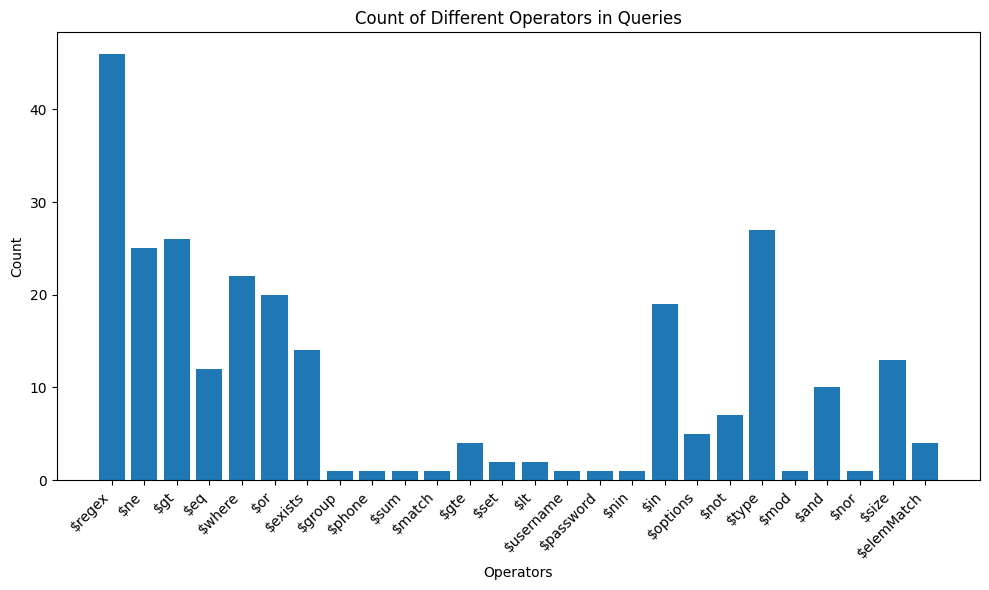

In [23]:
import re
import matplotlib.pyplot as plt


# Function to extract different operators from the queries
def extract_operators(query):
    # Using regular expression to find operators (e.g., $regex, $ne, $gt, etc.)
    operators = re.findall(r'"(\$[^"]+)"', query)
    return operators

# Count the occurrences of different operators
def count_operators(queries):
    operator_counts = {}
    for query, _ in queries:
        operators = extract_operators(query)
        for operator in operators:
            operator_counts[operator] = operator_counts.get(operator, 0) + 1
    return operator_counts

# Plot a bar graph for operator counts
def plot_operator_counts(operator_counts):
    operators = list(operator_counts.keys())
    counts = list(operator_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(operators, counts)
    plt.xlabel("Operators")
    plt.ylabel("Count")
    plt.title("Count of Different Operators in Queries")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Call the functions to generate the graphs
operator_counts = count_operators(queries)
plot_operator_counts(operator_counts)


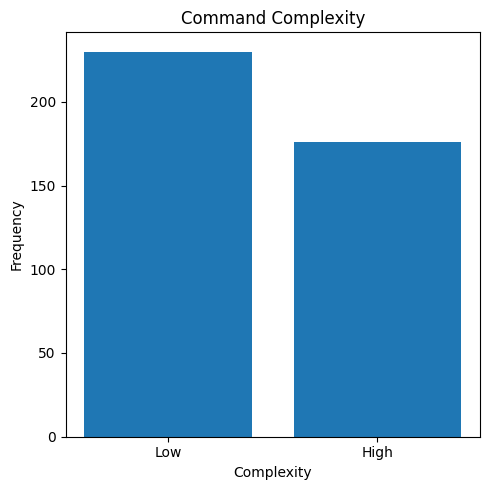

In [24]:
import matplotlib.pyplot as plt
import re

# Feature 1: Operator Counts
operator_counts = [len(re.findall(r'\$\w+|\$eq|\$regex|\$ne|\$gt|\$lt|\$in|\$nin|\$exists', query)) for query, _ in queries]

# Feature 2: Parameter Counts
param_counts = [len(re.findall(r'{}', query)) for query, _ in queries]

# Feature 3: Command Complexity
def extract_operators(query):
    # Using regular expression to find operators (e.g., $regex, $ne, $gt, etc.)
    operators = re.findall(r'"(\$[^"]+)"', query)
    return operators
# Function to calculate the command complexity
def calculate_command_complexity(query):
    complexity_score = 0

    # Increase complexity for specific risky operators
    operators = extract_operators(query)
    risky_operators = ['$regex', '$ne', '$gt', '$in', '$nin', '$where', '$or', '$and']
    complexity_score += sum(1 for operator in operators if operator in risky_operators)

    # Increase complexity for potential injection patterns
    injection_patterns = ['1 == 1', 'sleep(', ';it=new Date();', 'do{pt=new Date();}']
    complexity_score += sum(1 for pattern in injection_patterns if pattern in query)

    return complexity_score

command_complexities = [calculate_command_complexity(query) for query, _ in queries]

# Plotting different features
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.hist(command_complexities, bins=[0, 1, 2], align='left', rwidth=0.8)
axs.set_title('Command Complexity')
axs.set_xticks([0, 1])
axs.set_xticklabels(['Low', 'High'])
axs.set_xlabel('Complexity')
axs.set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [25]:
#used to remove similar data present:


def is_similar(command1, command2, similarity_threshold=0.8):
    # Compare similarity of two commands using Jaccard similarity
    set1 = set(command1.split())
    set2 = set(command2.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity >= similarity_threshold # returns a 1 or 0 

def clean_dataset(dataset, similarity_threshold=0.8):
    cleaned_commands = set()
    similar_commands = set()
    
    for command, label in dataset:
        is_duplicate = False
        is_similar_command = False
        
        # Check for exact duplicates
        if command in cleaned_commands:
            is_duplicate = True
        else:
            # Check for similar commands
            for cleaned_command in cleaned_commands:
                if is_similar(command, cleaned_command, similarity_threshold): # 0.8 is the similarity threshold above which two commands are considered similar and one of them is removed
                    similar_commands.add(command)
                    is_similar_command = True
                    break

        if not is_duplicate and not is_similar_command:
            cleaned_commands.add(command)

    cleaned_dataset = [(command, label) for command, label in dataset if command in cleaned_commands]
    return cleaned_dataset

# Assuming "dataset" contains the original dataset you provided


cleaned_dataset = clean_dataset(queries)
print(cleaned_dataset)


[('{"user": "{}", "password": "{}"}', 0), ('{"username": {"$regex": "^{}"}}', 1), ('{"username": {"$ne": "{}"}}', 1), ('{"username": {"$gt": "{}"}}', 1), ('{"user": "hacker", "password": {"$ne": ""}}', 1), ('{"user": req.query.user, "password": req.query.password}', 0), ('{"user": "hacker", "password": {"&ne": ""}}', 1), ('{"user": req.params[\'user\'], "password": req.params[\'password\']}', 0), ('{"user": request.GET[\'user\'], "password": request.GET[\'password\']}', 0), ('{"user": req.query.user_id, "password": req.query.user_pass}', 0), ('{"user": req.params[\'user_id\'], "password": req.params[\'user_pass\']}', 0), ('db.users.find({"user": "user123", "email": "user123@example.com"})', 0), ('db.users.find({"user": request.GET[\'user\'], "password": request.GET[\'password\']})', 0), ("db['users'].find({:user => req.params['user'], :password => req.params['password']})", 0), ('db.collection(\'users\').find({"user": "hacker", "password": {"&ne": ""}})', 1), ('}); db.dropDatabase(); d

In [26]:
#count of the benign and malicious commands:
label_1 = 0
label_0 = 0
for command, label in cleaned_dataset:
    if label == 1:
        label_1 += 1
    elif label == 0:
        label_0 += 1
overall = label_0+label_1
print(f"There are {label_1} malicious commands and {label_0} benign commands Concluding {overall} commands")


There are 222 malicious commands and 178 benign commands Concluding 400 commands


In [27]:
#command to just generate a json dataset consisting all the commands :
dataset = []
output_file = "finaldataset.json"
for comd in cleaned_dataset:
    payload,label = comd
    data_point = {"text":payload, "label":label}
    dataset.append(data_point)

with open(output_file,'w')as f:
    json.dump(dataset, f, indent=2)

print(f"absolute dataset generated and saved to {output_file}")
    
    
    

absolute dataset generated and saved to finaldataset.json


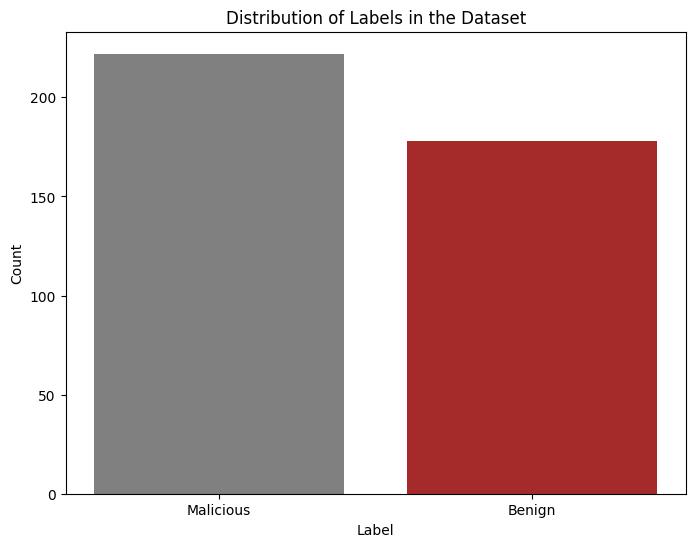

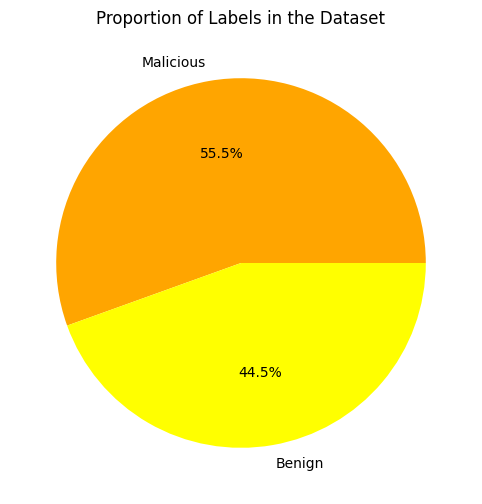

In [28]:
import matplotlib.pyplot as plt

def visualize_dataset(dataset):
    # Count the number of occurrences of each label
    label_counts = {"Malicious": 0, "Benign": 0}
    for data_point in dataset:
        label_counts["Malicious" if data_point["label"] == 1 else "Benign"] += 1

    # Bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(label_counts.keys(), label_counts.values(), color=['gray', 'brown'])
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title("Distribution of Labels in the Dataset")
    plt.show()

    # Pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', colors=['orange', 'yellow'])
    plt.title("Proportion of Labels in the Dataset")
    plt.show()

# Assuming you have already generated the 'dataset' variable from the previous code
# dataset = [{"text": "...", "label": 0/1}, {"text": "...", "label": 0/1}, ...]

# Call the function to visualize the dataset
visualize_dataset(dataset)
